In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import json
import pickle
from scipy.sparse import csr_matrix, save_npz, load_npz

%matplotlib inline
plt.style.use('ggplot')

In [ ]:
#df = pd.concat([pd.read_csv(f) for f in glob.glob('/content/drive/Othercomputers/MyMacBookPro/capstone3/data_CSV/*.csv')], ignore_index = True)

In [ ]:
#df

In [ ]:
#df['trackid'] = df['trackid'].str.replace('spotify:track:', '')
#df['album_id'] = df['album_id'].str.replace('spotify:album:', '')

In [42]:
data = pd.read_pickle("/content/drive/Othercomputers/MyMacBookPro/capstone3/playlist_continuation/website/data.pkl")

In [43]:
dfs = pd.read_pickle("/content/drive/Othercomputers/MyMacBookPro/capstone3/playlist_continuation/website/data2.pkl")

In [5]:
# from scipy.sparse import csr_matrix
# from pandas.api.types import CategoricalDtype

In [6]:
# playlist_c = CategoricalDtype(sorted(data.pid.unique()), ordered=True)
# song_c = CategoricalDtype(sorted(data.trackid.unique()), ordered=True)

In [7]:
# col = data.pid.astype(playlist_c).cat.codes
# row = data.trackid.astype(song_c).cat.codes
# sparse = csr_matrix((data["one"], (row, col)), \
#                            shape=(song_c.categories.size, playlist_c.categories.size))

In [44]:
sparse = load_npz('/content/drive/Othercomputers/MyMacBookPro/capstone3/playlist_continuation/website/sparse2.npz')

In [88]:
from sklearn.neighbors import NearestNeighbors, kneighbors_graph

In [81]:
# define model
model_knn = NearestNeighbors(metric='cosine', algorithm='auto', n_neighbors=20, n_jobs=-1)
# fit
model_knn.fit(sparse)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
                 radius=1.0)

In [ ]:
#save_npz('/content/drive/Othercomputers/MyMacBookPro/capstone3/playlist_continuation/website/sparse2.npz', sparse)

TypeError: ignored

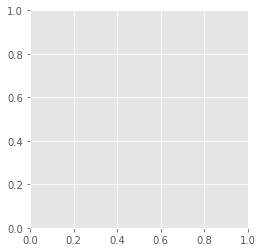

In [47]:
from collections import Counter

In [85]:
def rec(playlist_index):  
  distances, indices = model_knn.kneighbors(sparse[playlist_index], n_neighbors=500)
  raw_recommends = sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x: x[1])[:0:-1]
  print(raw_recommends)
  dif_songs = []
  for (idx, dist) in raw_recommends:
    dif = sparse[idx] - sparse[playlist_index]
    dif[dif<0] = 0
    dif_indicies = dif.nonzero()
    dif_songs.append(dif_indicies[1])
  total = np.hstack(dif_songs)
  common = Counter(total).most_common(5)
  song_indicies_list = []
  for row in common:
    song_indicies_list.append(row[0])
    track_uri = []
    for idx in song_indicies_list:
        track_uri.append(dfs.index[idx])
  print(track_uri)

In [ ]:
#data.to_pickle('/content/drive/Othercomputers/MyMacBookPro/capstone3/playlist_continuation/website/data.pkl')

In [86]:
rec(0)

[(1957, 0.961424162509477), (6200, 0.9612507870853936), (9146, 0.9611192104320131), (8573, 0.9611192104320131), (1923, 0.9611192104320131), (309, 0.9611192104320131), (8296, 0.9608969056497112), (815, 0.9608181933743845), (6604, 0.9608181933743845), (4875, 0.9607162899340806), (6055, 0.9607162899340806), (1632, 0.9607162899340806), (3232, 0.9607162899340806), (7959, 0.9607162899340806), (9585, 0.9607162899340806), (3244, 0.9607162899340806), (4766, 0.9607162899340806), (516, 0.9605100748160605), (9776, 0.9603005777216391), (6350, 0.9603005777216391), (1156, 0.9599679615487282), (7584, 0.9598713823047436), (9486, 0.9598713823047436), (4841, 0.9598713823047436), (4339, 0.9598713823047436), (6062, 0.9597741006645435), (9301, 0.959427958703321), (4136, 0.9593777768148806), (8840, 0.9593147868201765), (439, 0.9592006625758597), (7021, 0.9592006625758597), (3563, 0.9591751709536137), (8543, 0.9589695030068891), (131, 0.9589695030068891), (2119, 0.9589695030068891), (1273, 0.9589695030068891)

In [71]:
def similar_playlists(playlist_index):
  distances, indices = model_knn.kneighbors(sparse[playlist_index], n_neighbors=50)
  raw_recommends = sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x: x[1])[:0:-1]
  top_pid = []
  sim = []
  for row in raw_recommends[:5000]:
    top_pid.append(row[0])
    sim.append(row[1])
  return top_pid, sim

Text(0.5, 0, 'Playlists')

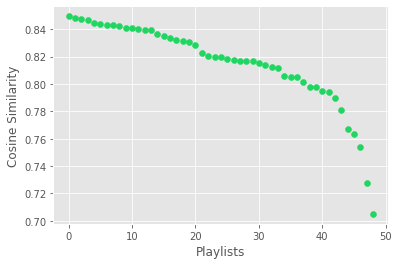

In [72]:
pid, sim = similar_playlists(0)
x_pos = np.arange(len(pid)) 

plt.scatter(x_pos, sim, color=(30/256, 215/256, 96/256, 1))
plt.ylabel('Cosine Similarity')
plt.xlabel('Playlists')

In [87]:
get_track_name('5dNfHmqgr128gMY2tc5CeJ')

'Ignition - Remix'

In [51]:
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

In [52]:
def knn_comparison(data, k):
 x = data[['pid',’Y’]].values
 y = data[‘class’].astype(int).values
 clf = neighbors.KNeighborsClassifier(n_neighbors=k)
 clf.fit(x, y)
# Plotting decision region
 plot_decision_regions(x, y, clf=clf, legend=2)
# Adding axes annotations
 plt.xlabel(‘X’)
 plt.ylabel(‘Y’)
 plt.title(‘Knn with K=’+ str(k))
 plt.show()


SyntaxError: ignored

In [ ]:
for i in [1,5,20,30,40,80]:
    knn_comparison(data, i)

In [ ]:
def get_pid_name(idx):
  return data[data['pid'] == dfs.columns[idx]]['playlist_name'].iloc[0]

In [33]:
def get_track_name(idx):
  return data[data['trackid'] == idx]['track_name'].iloc[0]

In [24]:
#dfs = pd.DataFrame.sparse.from_spmatrix(sparse, index=song_c.categories, columns=playlist_c.categories)

In [ ]:
#dfs['total'] = dfs.sum(axis=1)

In [ ]:
#dfs = dfs.drop(dfs[dfs['total'] ==1].index)

In [ ]:
#dfs

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999,total
000VZqvXwT0YNqKk7iG2GS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
000xQL6tZNLJzIrtIgxqSl,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45
002KbOVOX22zbNDwwnA0Wi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
002PgfoyfrOGiKch4EW8Wm,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
004skCQeDn1iLntSom0rRr,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7zxRMhXxJMQCeDDg0rKAVo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58
7zxk9DyDD1WBHVYYcIsttO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
7zyYmIdjqqiX6kLryb7QBx,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
7zywdG4ysfC5XNBzjQAo2o,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [ ]:
#dfs.drop(columns='total', inplace=True)

In [ ]:
#dfs

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
000VZqvXwT0YNqKk7iG2GS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
000xQL6tZNLJzIrtIgxqSl,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
002KbOVOX22zbNDwwnA0Wi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
002PgfoyfrOGiKch4EW8Wm,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
004skCQeDn1iLntSom0rRr,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7zxRMhXxJMQCeDDg0rKAVo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7zxk9DyDD1WBHVYYcIsttO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7zyYmIdjqqiX6kLryb7QBx,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7zywdG4ysfC5XNBzjQAo2o,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
sparse = csr_matrix(dfs.values)

In [ ]:
sparse = sparse.asfptype()

In [ ]:
test = pd.DataFrame(columns=dfs.columns)
train = pd.DataFrame(columns=dfs.columns)
test_ratio = 0.2 #fraction of data to be used as test set.
for u in users:
    temp = data[data['userId'] == u]
    n = len(temp)
    test_size = int(test_ratio*n)
temp = temp.sort_values('timestamp').reset_index()
temp.drop('index', axis=1, inplace=True)
    
dummy_test = temp.ix[n-1-test_size :]
dummy_train = temp.ix[: n-2-test_size]
    
test = pd.concat([test, dummy_test])
train = pd.concat([train, dummy_train])

In [ ]:
from scipy.sparse.linalg import svds, eigs

In [ ]:
u, s, vt = svds(sparse, k=6)

In [ ]:
from sklearn.decomposition import NMF

def fit_nmf(r):
    nmf = NMF(n_components=r)
    nmf.fit(dfs)
    W = nmf.transform(dfs)
    H = nmf.components_
    return nmf.reconstruction_err_

error = [fit_nmf(i) for i in range(1,400)]
plt.plot(range(1,400), error)
plt.xticks(range(1, 400))
plt.xlabel('r')
plt.ylabel('Reconstruction Error')

In [ ]:
from sklearn.decomposition import NMF

In [ ]:
nmf = NMF(n_components=6)
nmf.fit(dfs)
W = nmf.transform(dfs)
H = nmf.components_
print('RSS = %.2f' % nmf.reconstruction_err_)

RSS = 740.81


In [ ]:
!pip install surprise

     |████████████████████████████████| 11.8 MB 3.6 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617771 sha256=55f3edb8ed0a9e9f5b84735bf96d1c5acd1590c7f1428796f532d16dd1067064
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
import seaborn as sns


from collections import defaultdict #data colector

#Surprise: https://surprise.readthedocs.io/en/stable/


from surprise.reader import Reader
from surprise import Dataset
from surprise.model_selection import GridSearchCV

  ##CrossValidation
from surprise.model_selection import cross_validate


  ##Matrix Factorization Algorithms
from surprise import SVD
from surprise import NMF

np.random.seed(42) # replicating results

In [ ]:
reader = Reader(rating_scale=(0, 1)) #line_format by default order of the fields
data = Dataset.load_from_df(dfs.columns, dfs.index, reader=reader)

trainset = data.build_full_trainset()

testset = trainset.build_anti_testset()

TypeError: ignored

In [ ]:
# Most popular songs

In [ ]:
data[['track_name', 'artist_name']].value_counts().nlargest(10).plot(kind='barh', title='Most Popular Songs', color=(30/256, 215/256, 96/256, 1))
plt.xlabel('Number of Occurances in all Playlists')
plt.ylabel('Song')
plt.gca().invert_yaxis()
plt.savefig('/content/drive/Othercomputers/MyMacBookPro/capstone3/playlist_continuation/images/pop_songs.jpg', dpi=300);

In [ ]:
# Most popular names of songs

In [ ]:
data['track_name'].value_counts().nlargest(10).plot(kind='barh', title='Most Popular Song Titles', color=(30/256, 215/256, 96/256, 1))
plt.xlabel('Number of Occurances in all Playlists')
plt.ylabel('Song Title')
plt.gca().invert_yaxis()
plt.savefig('/content/drive/Othercomputers/MyMacBookPro/capstone3/playlist_continuation/images/pop_song_titles.jpg', dpi=300);

In [ ]:
data[['track_name', 'artist_name']].value_counts().nlargest(10)

In [ ]:
# Most popular playlist names

In [ ]:
data[data['position'] == 0]['playlist_name'].value_counts().nlargest(10).plot(kind='barh', title='Most Popular Playlist Names', color=(30/256, 215/256, 96/256, 1))
plt.xlabel('Number of Occurances')
plt.ylabel('Playlist Name')
plt.gca().invert_yaxis()
plt.savefig('/content/drive/Othercomputers/MyMacBookPro/capstone3/playlist_continuation/images/pop_playlist_titles.jpg', dpi=300);

In [ ]:
data[data['position'] == 0]['playlist_name'].value_counts().nlargest(10)

In [ ]:
grouped = data[data['position'] == 0]

In [ ]:
len(grouped[grouped['playlist_name'] == 'rap'])

In [ ]:
# Most popular artists

In [ ]:
data['artist_name'].value_counts(sort=True).nlargest(10).plot(kind='barh', title='Most Popular Artists', color=(30/256, 215/256, 96/256, 1))
plt.xlabel('Number of Occurances in all Playlists')
plt.ylabel('Artist')
plt.gca().invert_yaxis()
plt.savefig('/content/drive/Othercomputers/MyMacBookPro/capstone3/playlist_continuation/images/pop_artists.jpg', dpi=300);

In [ ]:
# Most popular albums

In [ ]:
ax = data[['album_name', 'artist_name']].value_counts(sort=True).nlargest(10).plot(kind='barh', title='Most Popular Albums', color=(30/256, 215/256, 96/256, 1))
plt.xlabel('Number of Occurances in all Playlists')
plt.ylabel('Album and Artist')
plt.gca().invert_yaxis()
plt.savefig('/content/drive/Othercomputers/MyMacBookPro/capstone3/playlist_continuation/images/pop_albums.jpg', dpi=300);

In [ ]:
# Most popular album names

In [ ]:
data['album_name'].value_counts(sort=True).nlargest(10).plot(kind='barh', title='Most Popular Albums Titles', color=(30/256, 215/256, 96/256, 1))
plt.xlabel('Number of Occurances in all Playlists')
plt.ylabel('Album Titles')
plt.gca().invert_yaxis()
plt.savefig('/content/drive/Othercomputers/MyMacBookPro/capstone3/playlist_continuation/images/pop_album_titles.jpg', dpi=300);

In [ ]:
#data.to_pickle('/content/drive/Othercomputers/MyMacBookPro/capstone3/data.pkl')